## Data Definition

Match Number – signifies the unique match number given by Cricinfo to match with 		        their URL.
Over – signifies the ball number. There are six balls in every over with a total of 20	 overs per team.
InningsType – binary var .1 signifies Night Match and 2 signifies Day/Night match  
Ball Outcome – gives information on the final outcome of this ball. There can be    seven possible outcomes for a ball from 0 to 6.
- 0 - also called as ‘Dot Ball’ meaning NO RUNS were scored of this ball.
- 1 -	One run was scored of this ball
- 2 -	Two runs were scored of this ball
- 3 -	Three runs were scored of this ball
- 4 -	Four runs were scored of this ball
- 5 -	Five runs were scored of this ball
- 6 -	Six runs were scored of this ball
- 8 -  Byes/Leg Byes which counts as extras were scored of this ball
- 9 -  Wides were bowled in this ball and hence the ball was repeated
- 10 - The batsman got out of this ball.

PlayerName_x – the name of the batsman who faced this ball.
PlayerTeam_x – the name of the team represented by PlayerName_x
PlayerName_y – the name of the bowler who bowled the ball.
PlayerTeam_y – the name of the team represented by PlayerName_y.
Comments – the commentary data recorded for this ball


### Questions to answer

#### Q1. Comment on the quality of data. Also highlight things that are applicable like missing data points, inconsistent data etc.,


The data is higly unbalanced, as can be seen from the analysis below for predicting the Ball_Outcome ,
- 1     49799
- 0     42259
- 4     15295
- 2      8796
- 10     6438
- 6      5764
- 9      4729
- 8      2736
- 3       473
- 5        42

also few records are missing, around 191, for PlayerTeam_x and PlayerTeam_y columns. 
the data set is inconsistant and also contains column with raw text, which is usually not direct for analysis.

#### Q2. Describe a way in which you can set up a database for the provided dataset ensuring ACID data properties.


For relational database, the data could be saved in few tables, the table structure can be like,

**Match_Details** 
- MATCH_ID             * numeric*
- MATCH_NUMBER   *numeric pk* 
- MATCH_DETAIL   *varchar*


**Inning_Detais**
- INN_ID  *numeric pk*
- MATCH_ID *numeric fk*
- INN_TYPE *numeric*
- TOTAL_NO_OF_OVERS *numeric*

**Player_Team_Details**
- ID *numeric pk*
- TEAM_NAME *varchar*

**Pleayer_Details**
- PLAYER_ID *numeric pk*
- PLAYER_NAME *varchar*
- PLAYER_TYPE *numeric*
- CURRENT_TEAM *numeric fk*
- START_DATE *date*
- END_DATE *date*

**Match_progress_details**
- ID *numeric pk*
- MATCH_ID *numeric fk*
- INN_ID *numeric fk*
- OVER *numeric*
- BALL_OUTCOME *numeric*
- PLAYER_BOWLING *numeric*
- PLAYER_BATTING *numeric*
- COMMENTS *varchar*


#### Q3. The ‘Comments’ column in the dataset is filled with text data. How can you transform this column to perform data analysis? Describe ways in which you can do that and also write a script to perform the transformation.


the column could be transformed into the vector of words, by using any word embeddings or utilizing feature_extraction.text from sklean to generate word vector for furthur analysis.
the example could be seen in below notebook.

#### Q4. What are the top 5 inferences you can make from this data? (Clue: Make use of the ‘Comments’ column wisely). Also attach the script used to make this inference.


the inferences could be made are like,
1. Most of the outcome of the balls are either 0 or 1
2. Some player have played with multiple teams
3. Some players have done both batting and balling
4. Commets provide how the runs were scored, could be used to analyse the skill of the player
5. most of the matches are not played full 20 overs and median is slighly lower than 10 overs

#### Q5. The Ball_Outcome column is highly imbalanced. If you were to model the data, describe how you would handle this imbalance. Also write a script that would balance this data for modelling. 


the imbalanced data need to balanced better for generalization of model, else the model will be baised and recall score for model would be less even for high accuracy.
Few sampling methods could be used like SMOTE for syntehically generating the low class records, instead of duplicating the same.

#### Q6. Comment of the columns PlayerTeam_x and PlayerTeam_y. Will the analysis or modelling outcome of this dataset change when these columns are removed?


analysis yet to be done, but the null hypothesis could be formed that there should not be any effect if the team names are removed

#### Q7. What would be the modelling technique you’d chose for this dataset? Also touch upon the rationale behind your decision and the use cases where you’re modelling technique will fail for this dataset.


the modeling techinique could be choosed as multi class logistic regression, as the data have multiple class and size of data could be huge. if subset of data is anaysised, the multi class SVM approach (one vs one or one vs rest) could be used for classification and prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("IPLSlicedData.csv")
df.head(3)

,Match_Number,Over,InningsType,Ball_Outcome,PlayerName_x,PlayerTeam_x,PlayerName_y,PlayerTeam_y,Comments
0,335982,0.1,1,8,SC Ganguly,Kolkata Knight Riders,P Kumar,Royal Challengers Bangalore,and thats runs immediately as Praveen strays o...
1,335982,0.2,1,0,BB McCullum,Kolkata Knight Riders,P Kumar,Royal Challengers Bangalore,this one nips back in off the pitch very sharp...
2,335982,0.3,1,9,BB McCullum,Kolkata Knight Riders,P Kumar,Royal Challengers Bangalore,thats wide as Praveen bowls one down the legs


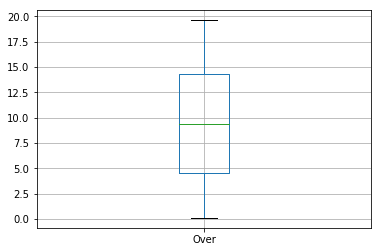

In [3]:
#df["Over"].hist( bins=10)
#df["Ball_Outcome"].hist( bins=10)
df.boxplot(column='Over')

histogram


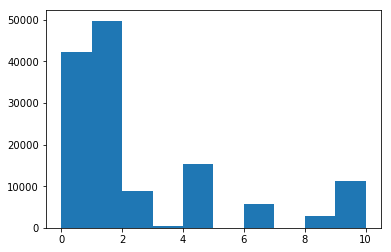

In [4]:
plt.hist(df["Ball_Outcome"])
print("histogram")

It can be seen that, the data for ball outcome is higly unbalanced, need to do some sampling like SMOTE to increase the counts of low numbered classes

In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Match_Number      0
Over              0
InningsType       0
Ball_Outcome      0
PlayerName_x      0
PlayerTeam_x    191
PlayerName_y      0
PlayerTeam_y    191
Comments          0
dtype: int64

Also, some of the records have missing data, for PlayerTeam_x and PlayerTeam_y 

In [6]:
df["Ball_Outcome"].value_counts()

1     49799
0     42259
4     15295
2      8796
10     6438
6      5764
9      4729
8      2736
3       473
5        42
Name: Ball_Outcome, dtype: int64

In [7]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

In [8]:

df_relevant_enconded = pd.get_dummies(df.drop(['Comments'], axis=1))

In [9]:
df_relevant_enconded.head(3)

,Match_Number,Over,InningsType,Ball_Outcome,PlayerName_x_A Ashish Reddy,PlayerName_x_A Chandila,PlayerName_x_A Chopra,PlayerName_x_A Flintoff,PlayerName_x_A Kumble,PlayerName_x_A Mishra,...,PlayerTeam_y_Gujarat Lions,PlayerTeam_y_Kings XI Punjab,PlayerTeam_y_Kochi Tuskers Kerala,PlayerTeam_y_Kolkata Knight Riders,PlayerTeam_y_Mumbai Indians,PlayerTeam_y_Pune Warriors,PlayerTeam_y_Rajasthan Royals,PlayerTeam_y_Rising Pune Supergiants,PlayerTeam_y_Royal Challengers Bangalore,PlayerTeam_y_Sunrisers Hyderabad
0,335982,0.1,1,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,335982,0.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,335982,0.3,1,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
print('At vectorizer')
vectorizer = TfidfVectorizer()
vectorized_comments = vectorizer.fit_transform(df['Comments'])


At vectorizer


In [ ]:
print(df.shape)
print(vectorized_comments.shape)
#vectorized_comments
df2 = pd.SparseDataFrame(vectorized_comments.toarray())

(136331, 9)
(136331, 14028)


In [10]:
#df3 = pd.concat([df, vectorized_comments], axis=1)
#print(df3.shape)

In [11]:
x_train, x_val, y_train, y_val = train_test_split(df_relevant_enconded.drop('Ball_Outcome', axis=1), df_relevant_enconded['Ball_Outcome'],
                                                  test_size = .2,
                                                  random_state=12)

In [12]:
print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_val",x_val.shape)
print("y_val",y_val.shape)

x_train (109064, 795)
y_train (109064,)
x_val (27267, 795)
y_val (27267,)


In [13]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/usr/local/anaconda3/envs/aind/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [14]:
print("x_train_res",x_train_res.shape)
print("y_train_res",y_train_res.shape)

x_train_res (148841, 795)
y_train_res (148841,)


In [15]:
#from sklearn.multiclass import OneVsRestClassifier
#from sklearn.svm import SVC

#classif = OneVsRestClassifier(SVC(kernel='linear'))
#classif.fit(x_train_res, y_train_res)
 
    
from sklearn import linear_model   
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(x_train_res, y_train_res)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
from sklearn.metrics import confusion_matrix
print('Validation Results')
print(logreg.score(x_val, y_val))
print(confusion_matrix(y_val, logreg.predict(x_val)))
#print('\nTest Results')
#print(logreg.score(test_features, test_target))
#print(recall_score(test_target, logreg.predict(test_features)))

Validation Results
0.366413613526
[[   0 8372    0    0    0    0    0    0    0    0]
 [   0 9991    0    0    0    0    0    0    0    0]
 [   0 1798    0    0    0    0    0    0    0    0]
 [   0   92    0    0    0    0    0    0    0    0]
 [   0 3099    0    0    0    0    0    0    0    0]
 [   0   11    0    0    0    0    0    0    0    0]
 [   0 1139    0    0    0    0    0    0    0    0]
 [   0  546    0    0    0    0    0    0    0    0]
 [   0  953    0    0    0    0    0    0    0    0]
 [   0 1266    0    0    0    0    0    0    0    0]]
